# Hipótesis 1:

### "Las provincias con una edad media menor y una renta media por hogar mayor a la nacional, suelen estar más concienciadas con el uso de energías renovables y utilizan más dispositivos que aprovechan este tipo de energía."

La justificación de esta hipótesis radica en que las personas jóvenes suelen estar más concienciadas con el medio ambiente, además de que tienen más tiempo para amortizar la inversión de este tipo de tecnología a lo largo de su vida.

<br>

### Preparación del entorno

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from ydata_profiling import ProfileReport
import os 
import scipy
import seaborn as sns

GOLD_DATA_PATH = os.path.join("..", "..", "data/gold/")

<br>

### Datos

Primero, cargamos el dataset correspondiente a la tarjeta de datos 1.

In [303]:
h1_df=pd.read_csv(GOLD_DATA_PATH+"data_card_1_df.csv", sep = ";", encoding = "latin")
h1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Provincias                                                   47 non-null     object 
 1   Población Total                                              47 non-null     int64  
 2   Renta media por hogar                                        47 non-null     int64  
 3   Edad media                                                   47 non-null     float64
 4   Porcentaje de hogares con dispositivos de energía renovable  47 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [304]:
# Ejemplo de los datos que presenta la tabla
h1_df.head(5)

,Provincias,Población Total,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable
0,Albacete,385727,30908,43.677523,4.314062
1,Alicante/Alacant,1901594,28965,43.766889,4.036060
2,Almería,740534,28442,40.320448,6.713842
3,Araba/Álava,334412,38586,44.565691,10.445424
4,Asturias,1004686,33242,48.683390,5.031368


<br>

### Correlación de variables

In [305]:
columns = h1_df.columns[1:]
crr_results = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        # Calculate Pearson correlation
        pearson = scipy.stats.pearsonr(h1_df[col1], h1_df[col2])
        pearson_corr = pearson[0]
        pearson_pval = pearson[1]
        
        # Calculate Spearman correlation
        spear = scipy.stats.spearmanr(h1_df[col1], h1_df[col2])
        spear_corr = spear.correlation
        spear_pval = spear.pvalue

            
        # Save results
        crr_results.append({
            'Feature 1': col1,
            'Feature 2': col2,
            'Pearson Correlation': pearson_corr,
            'Pearson p-value': pearson_pval,
            'Spearman Correlation': spear_corr,
            'Spearman p-value': spear_pval
        })


crr_results_df = pd.DataFrame(crr_results)
crr_results_df.head(10)

,Feature 1,Feature 2,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value
0,Población Total,Renta media por hogar,0.499812,0.000348,0.192183,0.195608
1,Población Total,Edad media,-0.350727,0.015647,-0.535037,0.000107
2,Población Total,Porcentaje de hogares con dispositivos de ener...,0.213060,0.150462,0.207447,0.161765
3,Renta media por hogar,Edad media,-0.164277,0.269846,-0.113205,0.448667
4,Renta media por hogar,Porcentaje de hogares con dispositivos de ener...,0.254432,0.084373,0.312905,0.032234
5,Edad media,Porcentaje de hogares con dispositivos de ener...,-0.444344,0.001754,-0.511101,0.000241


Nos centraremos en la fila 5 de la tabla de correlaciones. 
- Correlación de Pearson:
    - Valor de la correlación de Pearson: -0.444344.
        - El valor de la correlación de Pearson es negativo, lo que sugiere una relación inversa entre la edad media y el porcentaje de hogares con dispositivos de energía renovable. En otras palabras, cuando uno de estos valores aumenta, el otro tiende a disminuir.
        - El valor de la correlación de -0.444344 indica que hay una relación negativa moderada entre estas dos características.

    - Valor p de Pearson: 0.001754.
        - El valor p asociado con la correlación de Pearson es muy bajo (menor que 0.05), lo que sugiere que esta correlación es estadísticamente significativa. Es decir, la relación observada probablemente no sea aleatoria.

- Correlación de Spearman:
    - Valor de la correlación de Spearman: -0.511101.
        - La correlación de Spearman también es negativa, pero un poco más fuerte que la de Pearson.
        - Este valor también sugiere que conforme aumenta la edad media, tiende a disminuir el porcentaje de hogares con dispositivos de energía renovable.


    - Valor p de Spearman: 0.000241.
        - Al igual que el valor p de Pearson, el valor p de Spearman es extremadamente bajo, lo que indica que la correlación observada es estadísticamente significativa. Esto refuerza la conclusión de que existe una relación no aleatoria entre estas dos variables.

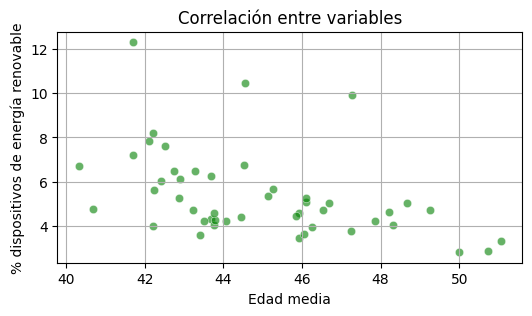

In [306]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=h1_df, x='Edad media', y='Porcentaje de hogares con dispositivos de energía renovable', color='green', alpha=0.6)
plt.title('Correlación entre variables')
plt.xlabel('Edad media')
plt.ylabel('% dispositivos de energía renovable')
plt.grid(True)
plt.show()

##### Conclusiones

Mediante el estudio de correlación, hemos podido confirmar que existe una relación negativa moderada entre la edad media y el porcentaje de hogares con dispositivos de energía renovable. Esto nos acerca a validar nuestra hipótesis, pero tenemos que tener en cuenta la renta media y la correlación entre variables no nos aporta nada para esta variable.

<br>

### Modelado

#### K-Means Clustering

In [307]:
# Preparación del entorno
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [308]:
# Se prepara el dataset para entrenar el modelo
X = h1_df.drop(columns=['Provincias', 'Población Total'])
scaler = StandardScaler() 
h1_df_scaled = scaler.fit_transform(X) # escalado de los datos (Media = 0 & Desviación estándar = 1)

¿Cuántos grupos queremos sacar del conjunto de datos?

Para responder a la hipótesis, sería beneficioso que el modelo identificara un grupo de provincias que presenten una edad media inferior a la media nacional y, simultáneamente, una renta media superior a la nacional.

Para determinar el número óptimo de grupos, se utilizará el método del codo (Elbow Method). Este método nos indica la ganancia que se obtiene al hacer n clusters. El objetivo es buscar el punto óptimo ganancia/clusters.

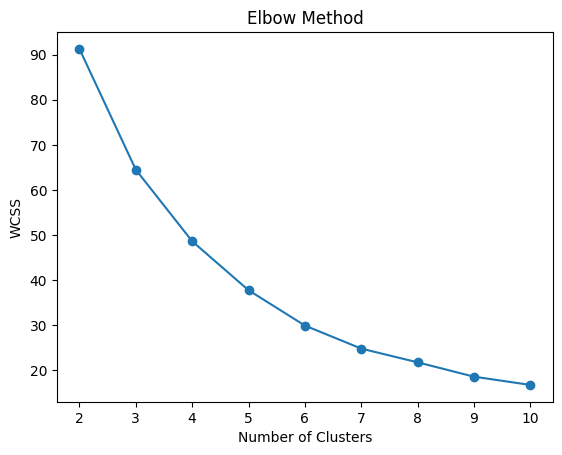

In [309]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(h1_df_scaled)
    wcss.append(kmeans.inertia_)

# Se dibuja la gráfica
plt.plot(range(2, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Entrenamos el modelo y vemos los resultados.

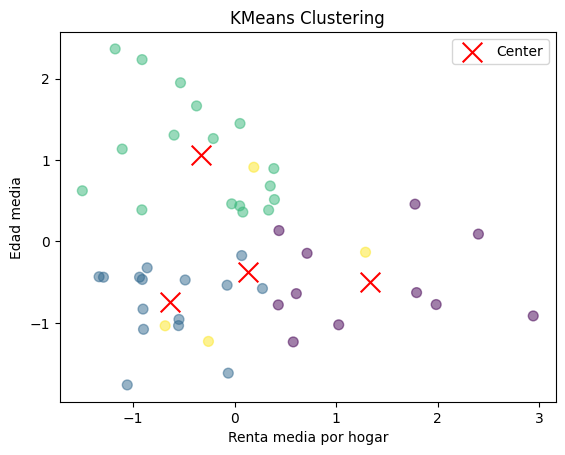

In [310]:
k = 4 # grupos

# Se entrena el modelo
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(h1_df_scaled)

# Clusters
cluster_labels = kmeans.labels_

# Gráfica para visualizar los clusters
plt.scatter(h1_df_scaled[:, 0], h1_df_scaled[:, 1], c=cluster_labels, cmap='viridis', s= 50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c= 'red', marker='x', s=200, label= 'Center')
plt.xlabel('Renta media por hogar')
plt.ylabel('Edad media')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [311]:
# Agregar etiquetas de clusters al DataFrame original
h1_df['Cluster_K-Means'] = cluster_labels
h1_df.head(5)

,Provincias,Población Total,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable,Cluster_K-Means
0,Albacete,385727,30908,43.677523,4.314062,1
1,Alicante/Alacant,1901594,28965,43.766889,4.036060,1
2,Almería,740534,28442,40.320448,6.713842,1
3,Araba/Álava,334412,38586,44.565691,10.445424,3
4,Asturias,1004686,33242,48.683390,5.031368,2


<br>

#### DBSCAN

In [312]:
# Preparación del entorno
from sklearn.cluster import DBSCAN
# https://www.youtube.com/watch?v=HMis89lGdkA

X = h1_df.drop(columns=['Provincias', 'Población Total', 'Cluster_K-Means'])

In [313]:
# Entrenamiento del modelo
clusters_DBSCAN = DBSCAN(eps = 2, min_samples=2).fit_predict(X)

:)